<a href="https://colab.research.google.com/github/weathon/dating-app-pub/blob/main/Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/weathon/dating-app-pub/main/res/data.csv

--2023-02-14 22:44:31--  https://raw.githubusercontent.com/weathon/dating-app-pub/main/res/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117447 (115K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>] 114.69K  --.-KB/s    in 0.02s   

2023-02-14 22:44:31 (4.99 MB/s) - ‘data.csv’ saved [117447/117447]



In [2]:
import pylab
import numpy as np
import pandas as pd
import scipy.stats
df = pd.read_csv("data.csv")
pylab.style.use("default")
pylab.rcParams["figure.figsize"] = (7,7)

In [3]:
def get_options(name):
    return sorted(list(df[name].drop_duplicates()))

def filter(**args):
    res = pd.DataFrame(df)
    for i in args.keys():
        res = res[res[i]==args[i]]
    return res

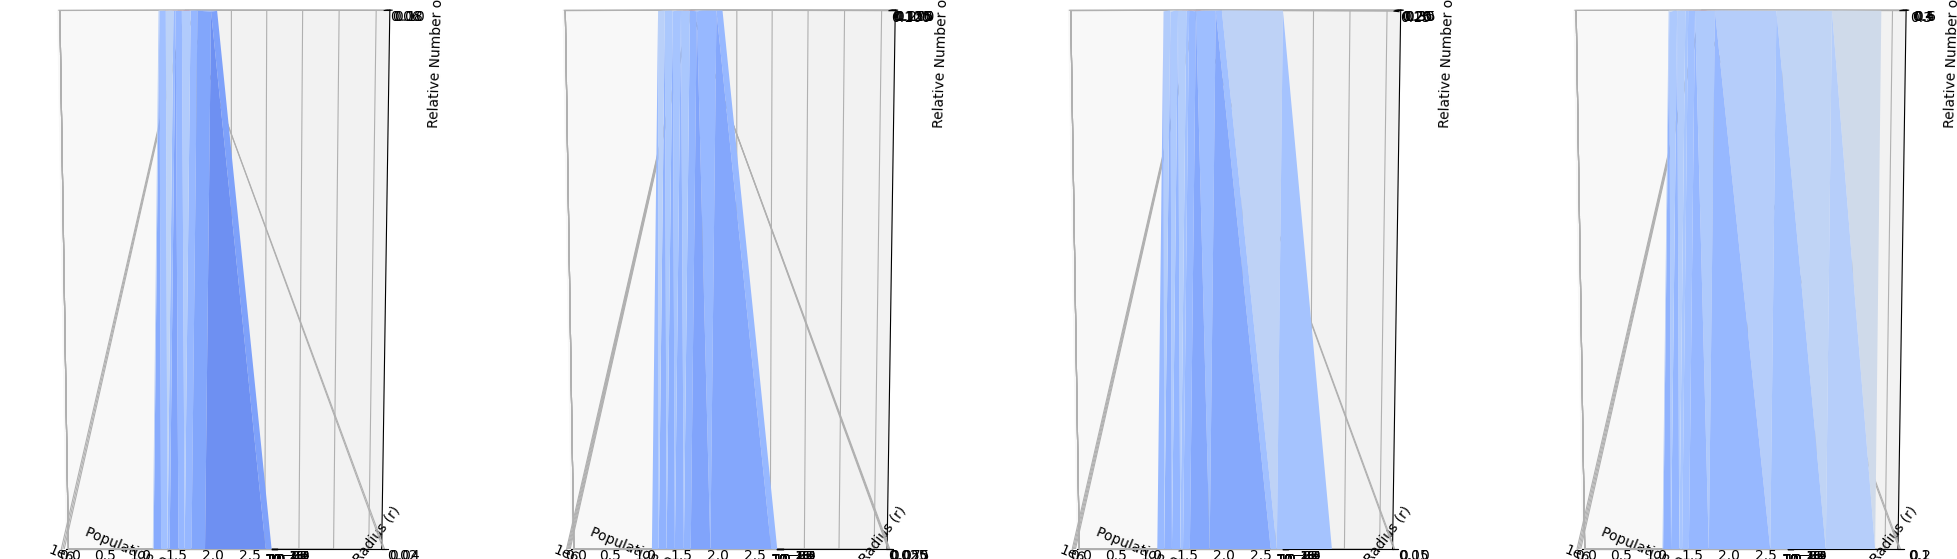

In [9]:
pylab.rcParams["figure.figsize"] = (25,7)
fig, ax = pylab.subplots(1,4,subplot_kw={"projection": "3d"})
# pylab.subplots_adjust(right=0.3)
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_adjust.html

for LENi in range(len(get_options("len"))):
  p = np.zeros(shape=(len(get_options("N")),len(get_options("r"))))
  for i in range(len(get_options("N"))):
    for j in range(len(get_options("r"))):
      p[i][j]=(filter(N=get_options("N")[i], r=get_options("r")[j], len=get_options("len")[LENi])["Call Counts"]/get_options("N")[i]).mean()

  X, Y = np.meshgrid(get_options("r"),get_options("N"))
  ax[LENi].plot_surface(Y,X,p, cmap=pylab.cm.coolwarm)
  ax[LENi].set_xlabel("\nPopulation Size (N)")
  ax[LENi].set_yscale('log')
  ax[LENi].set_ylabel("\nQuery Radius (r)")
  ax[LENi].set_zlabel("\nRelative Number of Calls (Calls/N)")
  # https://stackoverflow.com/questions/5525782/adjust-label-positioning-in-axes3d-of-matplotlib
# https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

In [7]:
Y/1e6

array([[0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
        0.005, 0.005, 0.005, 0.005, 0.005],
       [0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ,
        0.01 , 0.01 , 0.01 , 0.01 , 0.01 ],
       [0.03 , 0.03 , 0.03 , 0.03 , 0.03 , 0.03 , 0.03 , 0.03 , 0.03 ,
        0.03 , 0.03 , 0.03 , 0.03 , 0.03 ],
       [0.06 , 0.06 , 0.06 , 0.06 , 0.06 , 0.06 , 0.06 , 0.06 , 0.06 ,
        0.06 , 0.06 , 0.06 , 0.06 , 0.06 ],
       [0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  ,
        0.1  , 0.1  , 0.1  , 0.1  , 0.1  ],
       [0.2  , 0.2  , 0.2  , 0.2  , 0.2  , 0.2  , 0.2  , 0.2  , 0.2  ,
        0.2  , 0.2  , 0.2  , 0.2  , 0.2  ],
       [0.4  , 0.4  , 0.4  , 0.4  , 0.4  , 0.4  , 0.4  , 0.4  , 0.4  ,
        0.4  , 0.4  , 0.4  , 0.4  , 0.4  ],
       [1.2  , 1.2  , 1.2  , 1.2  , 1.2  , 1.2  , 1.2  , 1.2  , 1.2  ,
        1.2  , 1.2  , 1.2  , 1.2  , 1.2  ],
       [1.9  , 1.9  , 1.9  , 1.9  , 1.9  , 1.9  , 1.9  , 1.9  , 1.9  ,
        1

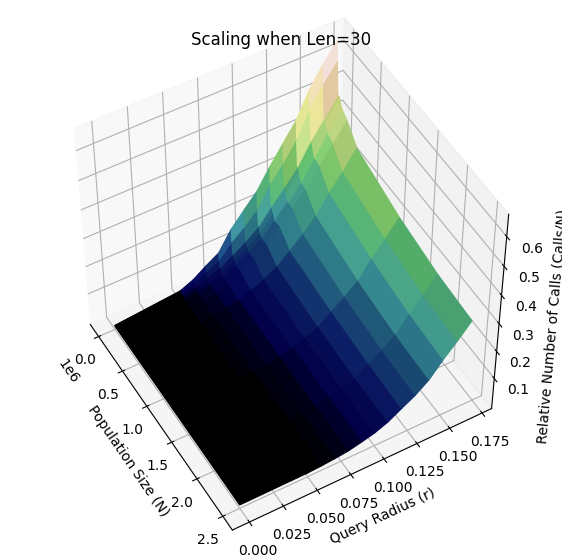

In [ ]:
pylab.rcParams["figure.figsize"] = (7,7)
fig, ax = pylab.subplots(subplot_kw={"projection": "3d"})
# pylab.subplots_adjust(right=0.3)
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_adjust.html

LENi = -1
p = np.zeros(shape=(len(get_options("N")),len(get_options("r"))))
for i in range(len(get_options("N"))):
  for j in range(len(get_options("r"))):
    p[i][j]=(filter(N=get_options("N")[i], r=get_options("r")[j], len=get_options("len")[LENi])["Call Counts"]/get_options("N")[i]).mean()

X, Y = np.meshgrid(get_options("r"),get_options("N"))
from matplotlib.colors import LightSource
# https://matplotlib.org/3.1.0/gallery/mplot3d/custom_shaded_3d_surface.html#sphx-glr-gallery-mplot3d-custom-shaded-3d-surface-py
ls = LightSource(270, 45)
rgb = ls.shade(p, cmap=pylab.cm.gist_earth, vert_exag=0.1, blend_mode='soft')
ax.plot_surface(Y,X,p, cmap=pylab.cm.coolwarm, facecolors=rgb)
ax.set_xlabel("Population Size (N)")
ax.set_ylabel("Query Radius (r)")
ax.set_zlabel("Relative Number of Calls (Calls/N)")
ax.set_title(f"Scaling when Len={get_options('len')[LENi]}")
ax.view_init(50, -30)
# https://www.geeksforgeeks.org/how-to-change-angle-of-3d-plot-in-python/ 
# https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

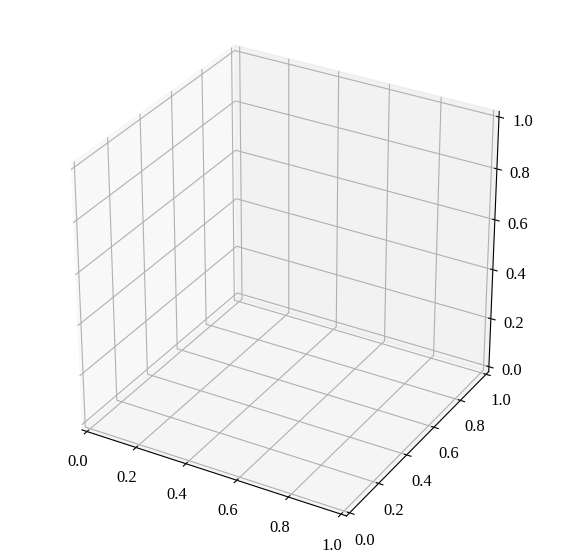

In [ ]:
pylab.rcParams["figure.figsize"] = (7,7)
fig, ax = pylab.subplots(subplot_kw={"projection": "3d"})


# pylab.subplots_adjust(right=0.3)
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_adjust.html
for LENi in range(len(get_options("len"))):
  p = np.zeros(shape=(len(get_options("N")),len(get_options("r"))))
  for i in range(len(get_options("N"))):
    for j in range(len(get_options("r"))):
      p[i][j]=(filter(N=get_options("N")[i], r=get_options("r")[j], len=get_options("len")[LENi])["Call Counts"]/get_options("N")[i]).mean()

  X, Y = np.meshgrid(get_options("r"),get_options("N"))
  from matplotlib.colors import LightSource
  ax.plot_surface(Y,X,p, cmap=pylab.cm.coolwarm)
  ax.set_xlabel("Population Size (N)")
  ax.set_ylabel("\nQuery Radius (r)")
  ax.set_zlabel("Relative Number of Calls (Calls/N)")
  ax.set_title(f"Scaling when Len={get_options('len')[LENi]}\n")
  pylab.savefig(f"scale{get_options('len')[LENi]}.png")
  pylab.cla()

In [ ]:
pylab.rcParams.update({'font.size': 12})
pylab.rcParams["font.family"] = "Liberation Serif" # run here otherwise wont work

In [ ]:
!rm *.png *.svg

Text(0.5, 0.92, 'Scaling when Len=15')

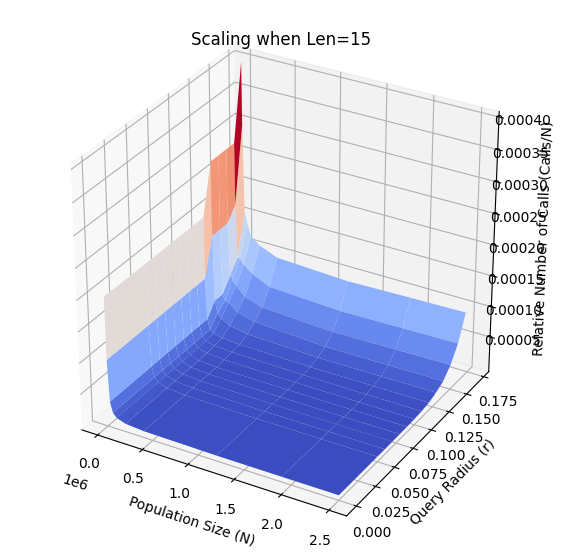

In [ ]:
pylab.rcParams["figure.figsize"] = (7,7)
fig, ax = pylab.subplots(subplot_kw={"projection": "3d"})
# pylab.subplots_adjust(right=0.3)
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_adjust.html

LENi = 1
p = np.zeros(shape=(len(get_options("N")),len(get_options("r"))))
for i in range(len(get_options("N"))):
  for j in range(len(get_options("r"))):
    p[i][j]=(filter(N=get_options("N")[i], r=get_options("r")[j], len=get_options("len")[LENi])["nFound"]).mean()/get_options("N")[i]

X, Y = np.meshgrid(get_options("r"),get_options("N"))
ax.plot_surface(Y,X,p, cmap=pylab.cm.coolwarm)
ax.set_xlabel("Population Size (N)")
ax.set_ylabel("Query Radius (r)")
ax.set_zlabel("Relative Number of Calls (Calls/N)")
ax.set_title(f"Scaling when Len={get_options('len')[LENi]}")
# ax.view_init(30, 290)
# https://www.geeksforgeeks.org/how-to-change-angle-of-3d-plot-in-python/ 
# https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

why nFound/N>0??? =25 
not /i /options[i]

In [ ]:
df["nFound"].drop_duplicates() 

0         1
5         3
6         2
7         5
15        7
       ... 
2574     75
2580    161
2581    138
2582    164
2583    133
Name: nFound, Length: 199, dtype: int64

In [ ]:
np.meshgrid([1,2,3],[4,5,6])

[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]), array([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6]])]

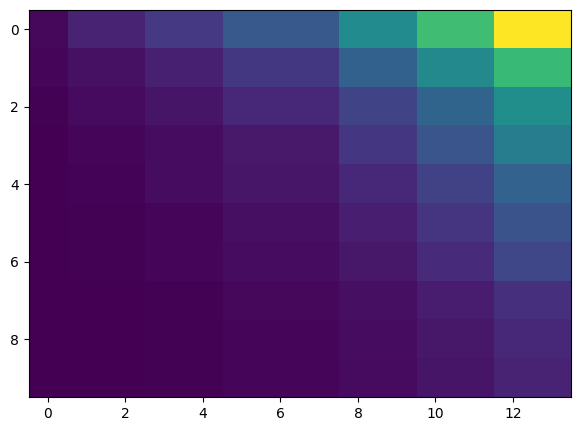

In [ ]:
pylab.imshow(p) # last time it seems random because forgot to sort options

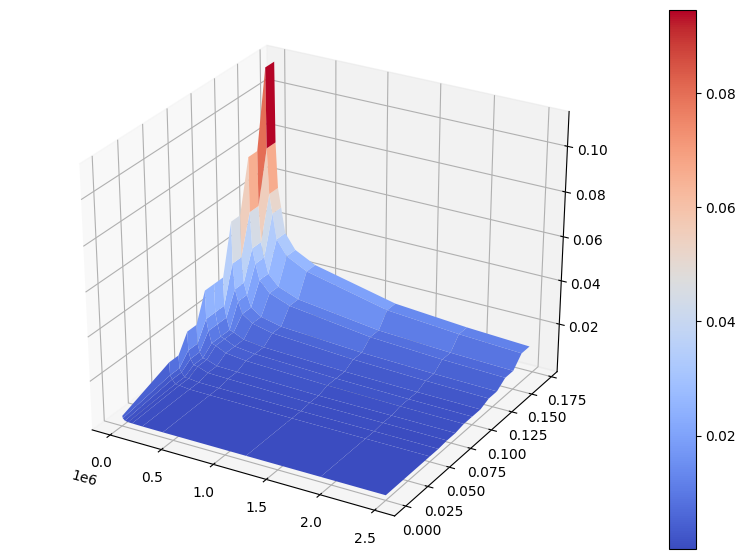

In [ ]:
pylab.rcParams["figure.figsize"] = (10,7)
fig, ax = pylab.subplots(subplot_kw={"projection": "3d"})
X, Y = np.meshgrid(get_options("r"),get_options("N"))
fig.colorbar(ax.plot_surface(Y,X,p, cmap=pylab.cm.coolwarm))
# https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

In [ ]:
frame1 = filter(len=10)["Time"]/filter(len=10)["Call Counts"]
frame2 = filter(len=30)["Time"]/filter(len=30)["Call Counts"]
scipy.stats.ttest_rel(frame1,frame2) 

Ttest_relResult(statistic=-2.7116314118589115, pvalue=0.006859808606010733)

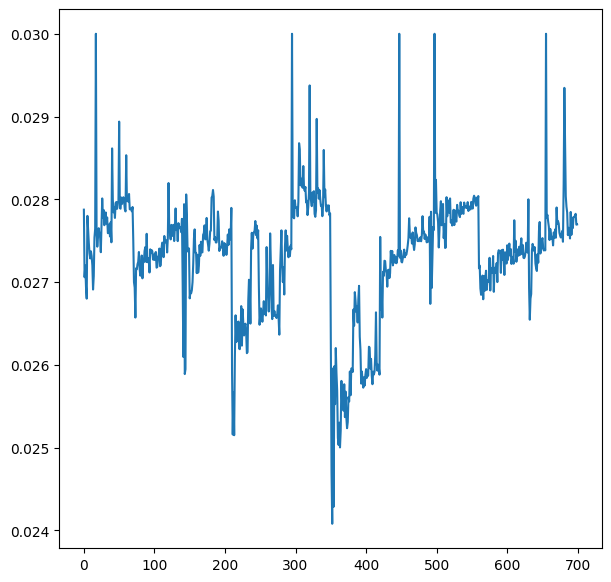

In [ ]:
pylab.plot([i if i<0.03 else 0.03 for i in frame1])

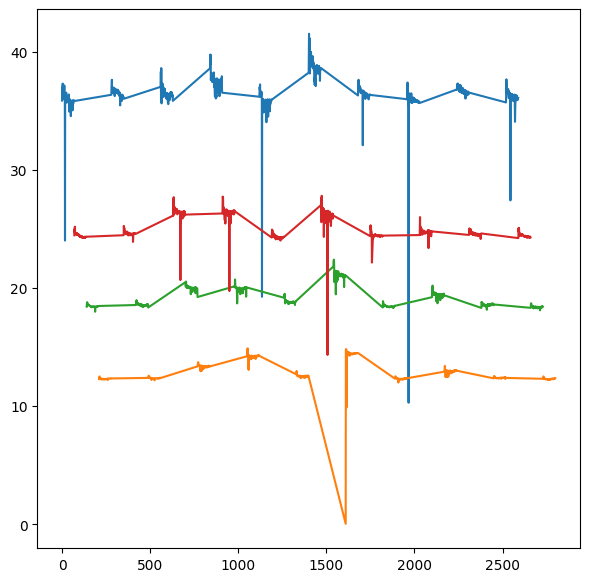

In [ ]:
pylab.plot(filter(len=10)["Call Counts"]/filter(len=10)["Time"])
pylab.plot(filter(len=30)["Call Counts"]/filter(len=30)["Time"])
pylab.plot(filter(len=20)["Call Counts"]/filter(len=20)["Time"])
pylab.plot(filter(len=15)["Call Counts"]/filter(len=15)["Time"])

Text(0, 0.5, 'Call Counts%')

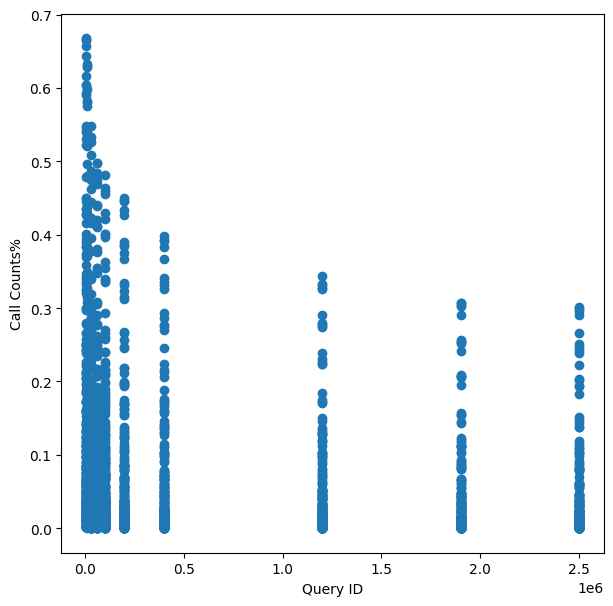

In [ ]:
f = filter() # lengniao surfacechart   N, r, z: call %
pylab.scatter(f["N"],f["Call Counts"]/f["N"])
pylab.title("")
pylab.xlabel("Query ID")
pylab.ylabel("Call Counts%")

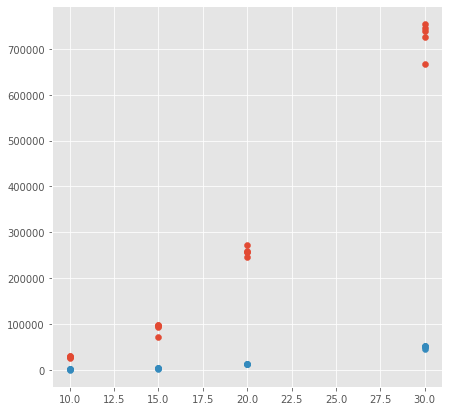

In [ ]:
f = filter(r=0.17, N=2500000)
pylab.scatter(f["len"],f["Call Counts"])
pylab.scatter(f["len"],f["Time"])